In [1]:
from ROOT import TFile, TCanvas, TH1D
import numpy as np
runNumbers1cm1580 = ["1572172309", "1572172623", "1572172945", "1572173331",\
                     "1572173645", "1572173990", "1572199259", "1572171025",\
                     "1572171442", "1572171865", "1572174366", "1572174791",\
                     "1572175181", "1571991208", "1572167644", "1572169691",\
                     "1572170351", "1572175587", "1572176260", "1572176931"]

Welcome to JupyROOT 6.22/02


In [2]:
#Using the 1cm data to compare the voltages

from ROOT import TF1
import matplotlib.pyplot as plt

#means for 1cm scintillator 
scintMeans1cm = []
holdScint = []
fitti = TF1('fitti', 'landau')

#make it a function so we can run it on any scintillator/voltage
def fittiGraph(runNums):
    #variables
    scintMeans = []
    holdScint = []
    fitti = TF1('fitti', 'landau')
    
    #base case, if the list of run nums is empty
    if runNums == []:
        return scintMeans
    #recursive step
    else:
        runName = "/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + runNums[0] + ".root"
        importFile = TFile(runName, "READ")
        RAWdata = importFile.Get("RAWdata")
        
        #draw the hist of the run with landau dist
        hist1 = TH1D("name", "hist", 100, 200, 3800)
        RAWdata.Draw("QDC0_ch0>>name", "QDC0_ch0<3800 && QDC0_ch0>200")
        hist1.Fit(fitti)
        
        #store the landau MPV and mean
        holdScint = [(fitti.GetParameter("MPV"), hist1.GetMean())]
        scintMeans = [(np.mean([i[0] for i in holdScint]), np.mean([i[1] for i in holdScint]))]
        
        return scintMeans + fittiGraph(runNums[1:])
#the second one is the hist mean, the first is the MPV            
#fittiGraph(runNumbers1cm1580)
#make it an array so that we can slice it easily
means1cm1580 = np.array(fittiGraph(runNumbers1cm1580))
#print(means1cm1580)
#print('means')
print('these are the MPVs')
print(means1cm1580[:,0])


these are the MPVs
[2877.89904164 2874.91408919 2877.66502357 2878.27112887 2874.54720774
 2876.03529748 3107.86936119 2908.44390211 2906.31867871 2889.18631138
 2881.16779135 2890.35463393 2897.84736454 3011.6478317  2877.81632509
 2883.08166077 2883.9820082  2872.17047544 2880.63595123 2858.21722976]
 FCN=811.05 FROM MIGRAD    STATUS=CONVERGED     106 CALLS         107 TOTAL
                     EDM=3.08828e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.8 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.61798e+04   1.31143e+02  -2.15287e-01   1.32900e-07
   2  MPV          2.87790e+03   1.08019e+00   2.61562e-04   2.09391e-05
   3  Sigma        1.48616e+02   7.26718e-01   1.50244e-06  -2.26475e-02
 FCN=777.09 FROM MIGRAD    STATUS=CONVERGED     115 CALLS         116 TOTAL
                     EDM=1.54314e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PA

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


(20,)
1cm 1580V
4.16278486487498


Text(0, 0.5, 'MPV')

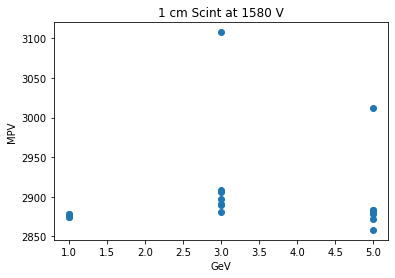

In [3]:
#comparison of 1cm to find constant between voltages for 1cm
#constant for the 1cm: 
GeV1580 = [1]*6 + [3]*7 + [5]*7 #x axis
#scintVal1cm1580 = np.array([x  for x in means1cm1580[:,0] if x < 3000]) #y axis
scintVal1cm1580 = means1cm1580[:,0]
print(scintVal1cm1580.shape)
print('1cm 1580V')
k1cm = np.polyfit(GeV1580,scintVal1cm1580,1)
print(k1cm[0])

plt.scatter(GeV1580,scintVal1cm1580)
plt.title('1 cm Scint at 1580 V')
plt.xlabel('GeV')
plt.ylabel('MPV')

In [4]:
np.corrcoef(GeV1580, scintVal1cm1580)

array([[1.       , 0.1188074],
       [0.1188074, 1.       ]])

[(3107.8693611947583, 3206.90238375021)]
 FCN=152.26 FROM MIGRAD    STATUS=CONVERGED     113 CALLS         114 TOTAL
                     EDM=2.104e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.70635e+03   4.93246e+01   2.06602e-01   1.03637e-05
   2  MPV          3.10787e+03   3.20217e+00   1.38976e-02   2.09098e-04
   3  Sigma        1.51240e+02   2.15602e+00   1.15587e-05  -7.66237e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


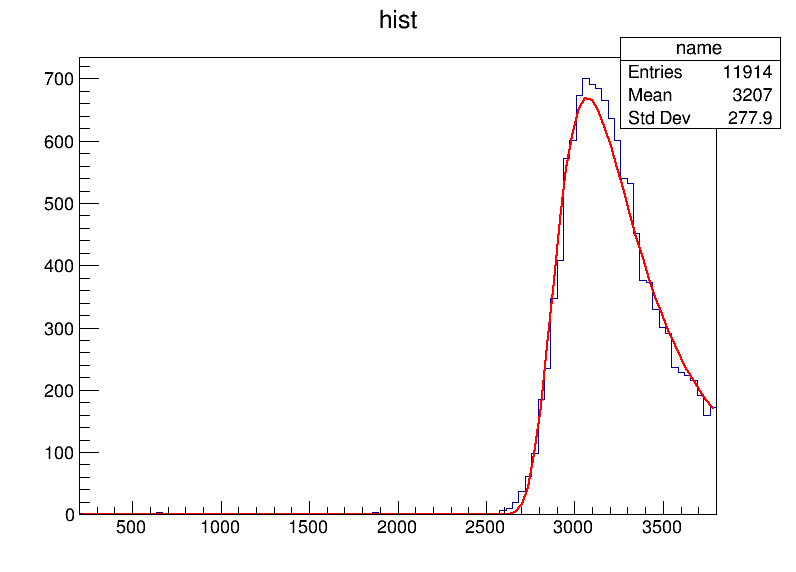

In [5]:
from ROOT import TFile, TCanvas, TH1D
import numpy as np
runNumbers1cm1580 = ["1572172309", "1572172623", "1572172945", "1572173331",
                     "1572173645", "1572173990", "1572199259", "1572171025",
                     "1572171442", "1572171865", "1572174366", "1572174791",
                     "1572175181", "1571991208", "1572167644", "1572169691",
                     "1572170351", "1572175587", "1572176260", "1572176931"]

runName = "/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1572199259.root"
importFile = TFile(runName, "READ")
RAWdata = importFile.Get("RAWdata")

#draw the hist of the run with landau dist
c1 = TCanvas("c1", "c1", 800, 600)
hist1 = TH1D("name", "hist", 100, 200, 3800)
RAWdata.Draw("QDC0_ch0>>name", "QDC0_ch0<3800 && QDC0_ch0>200")
hist1.Fit(fitti)
c1.Draw()

#store the landau MPV and mean
holdScint = [(fitti.GetParameter("MPV"), hist1.GetMean())]
scintMeans = [(np.mean([i[0] for i in holdScint]), np.mean([i[1] for i in holdScint]))]
print(scintMeans)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


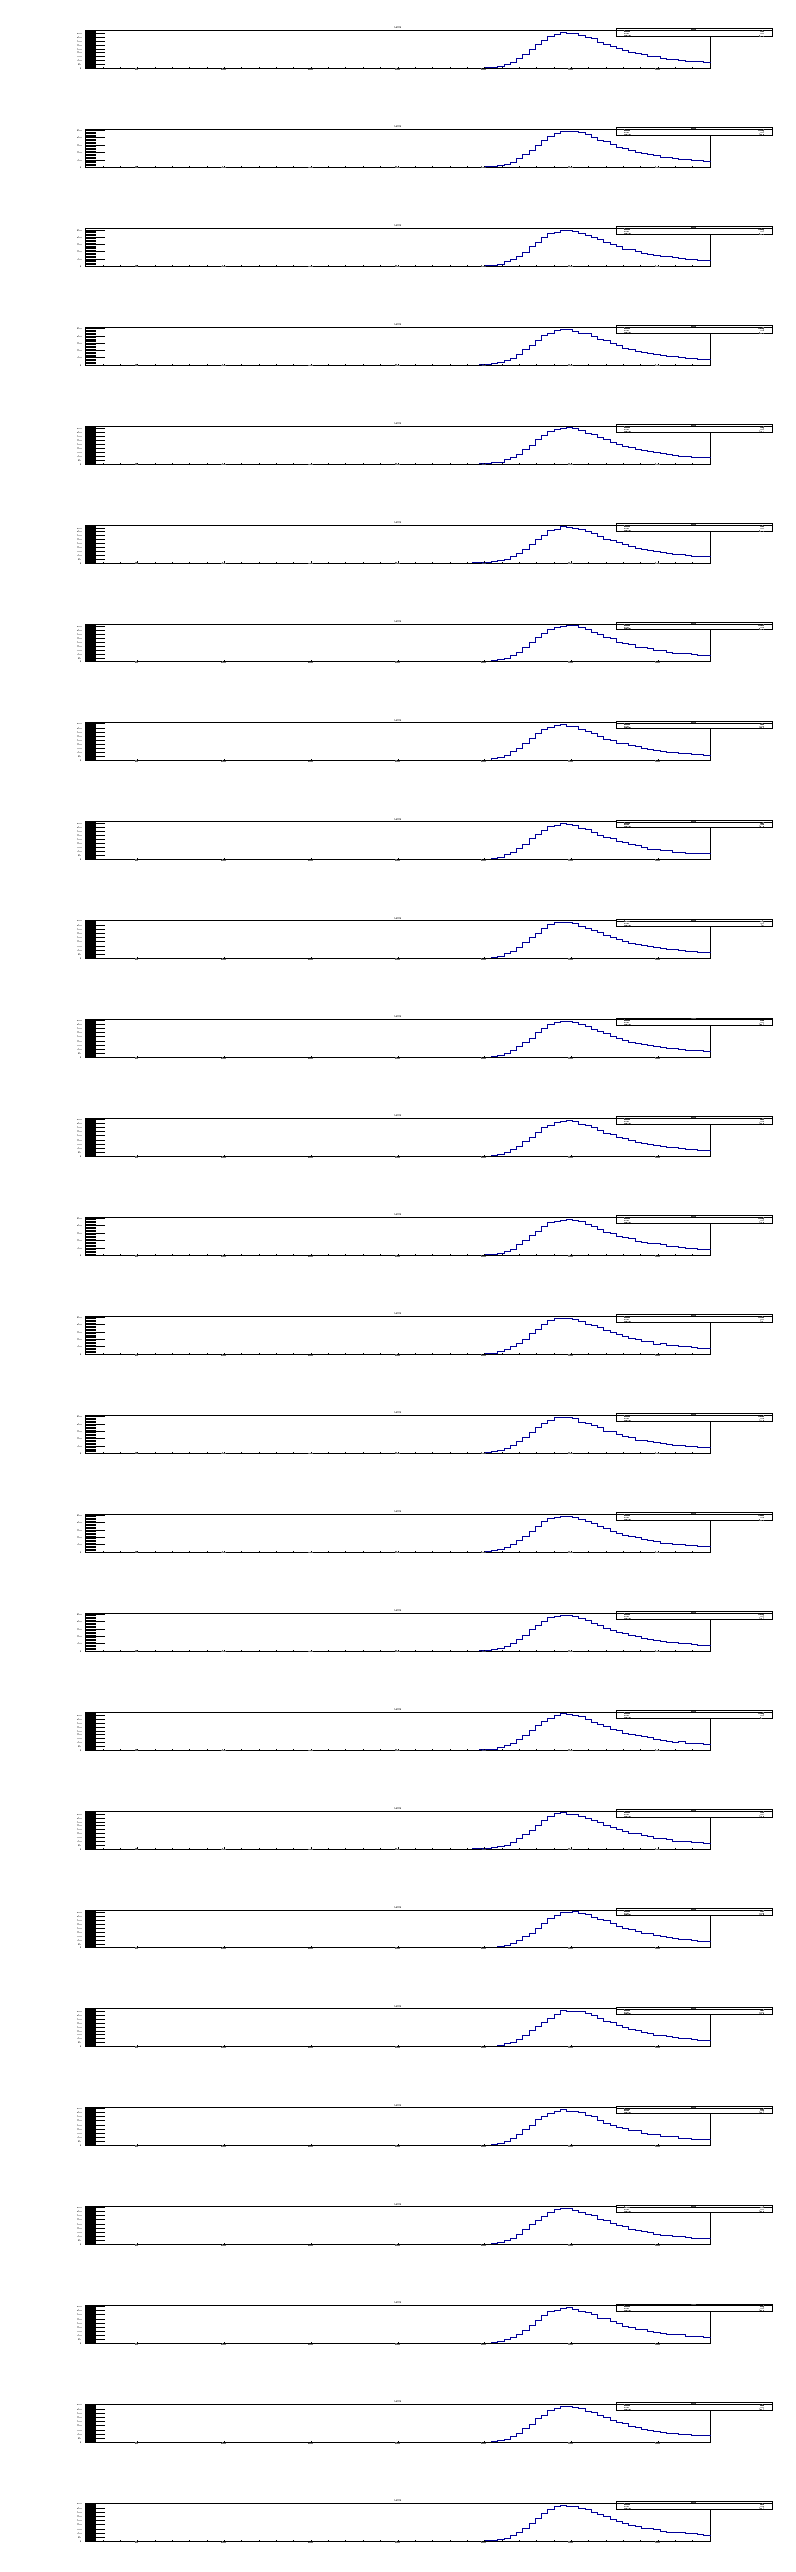

In [11]:
test_runs =  ["1572172309", "1572172623", "1572172945", "1572173331",
                     "1572173645", "1572173990", "1572199259", "1572171025",
                     "1572171442", "1572171865", "1572174366", "1572174791",
                     "1572175181", "1571991208", "1572167644", "1572169691",
                     "1572170351", "1572175587", "1572176260", "1572176931"]

test_runs = ["1571933143", "1571931737", "1571932015", "1571932325", 
           "1571932668", "1571933143", "1571933521", 
           "1571934315", "1571934931", "1571935652", "1571936276", 
           "1571936885", "1571937854", "1571938197", "1571938501", 
           "1571938794", "1571939126", "1571939524", "1571939912", 
           "1571950010", "1571950464", "1571950975", "1571951573", 
           "1571952203", "1571952846", "1571953473"]

c2 = TCanvas('c2', 'c2', 800, 100*len(test_runs))
c2.Divide(1, len(test_runs))
hist = [None] * len(test_runs)
importFile = [None] * len(test_runs)

for idx, run in enumerate(test_runs):
    runName = "/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + run + ".root"
    importFile[idx] = TFile(runName, "READ")
    RAWdata = importFile[idx].Get("RAWdata")
    c2.cd(idx+1)
    hist[idx] = TH1D('name', 'name', 100, 200, 3800)
    RAWdata.Draw("QDC0_ch0>>name", "QDC0_ch0<3800 && QDC0_ch0>200")
    c2.Draw()

TypeError: void TObject::Draw(const char* option = "") =>
    TypeError: takes at most 1 arguments (2 given)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TFile::Init>: file /nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571933929.root probably not closed, trying to recover
Warning in <TFile::Init>: no keys recovered, file has been made a Zombie


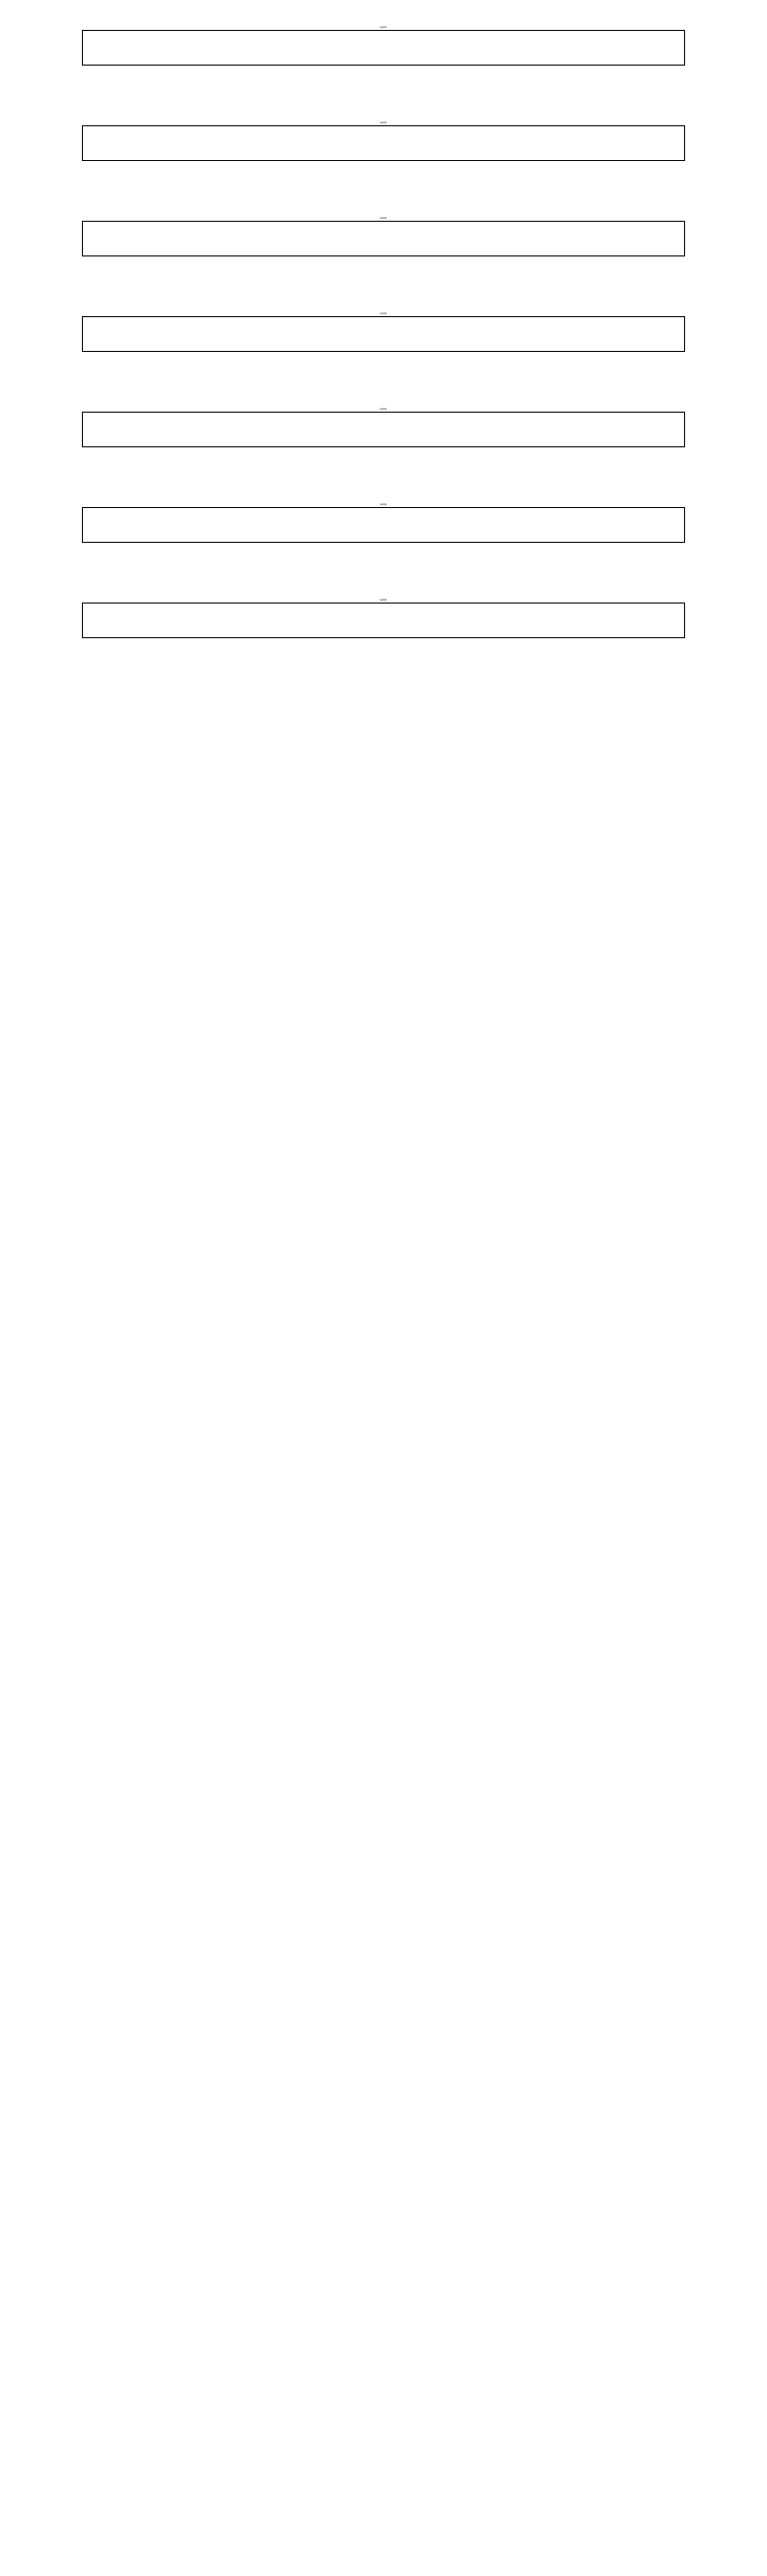

In [33]:
#Now we want to compare the way that the fitted MPV and the means vary over the different energies
test_runs =  ["1572172309", "1572172623", "1572172945", "1572173331",
                     "1572173645", "1572173990", "1572199259", "1572171025",
                     "1572171442", "1572171865", "1572174366", "1572174791",
                     "1572175181", "1571991208", "1572167644", "1572169691"]
test_runs=["1571933143", "1571931737", "1571932015", "1571932325", 
           "1571932668", "1571933143", "1571933521", "1571933929", 
           "1571934315", "1571934931", "1571935652", "1571936276", 
           "1571936885", "1571937854", "1571938197", "1571938501", 
           "1571938794", "1571939126", "1571939524", "1571939912", 
           "1571950010", "1571950464", "1571950975", "1571951573", 
           "1571952203", "1571952846", "1571953473"]


fitti = TF1("fitti", "landau")

c2 = TCanvas('c2', 'c2', 800, 100*len(test_runs))
c2.Divide(1, len(test_runs))

for idx, run in enumerate(test_runs):
    runName = "/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + run + ".root"
    importFile = TFile(runName, "READ")
    RAWdata = importFile.Get("RAWdata")
    c2.cd(idx+1)
    hist = TH1D('name', 'name', 100, 200, 3800)
    RAWdata.Draw("QDC0_ch0>>name", "QDC0_ch0<3800 && QDC0_ch0>200")
    c2.Draw()

In [8]:
f_arr

array([1, 1])